In [ ]:
import requests
import os
from torch_geometric.data import Dataset
import torch
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import numpy as np
import networkx as nx

# Data set class

In [2]:
class HW3Dataset(Dataset):
    url = 'https://technionmail-my.sharepoint.com/:u:/g/personal/ploznik_campus_technion_ac_il/EUHUDSoVnitIrEA6ALsAK1QBpphP5jX3OmGyZAgnbUFo0A?download=1'

    def __init__(self, root, transform=None, pre_transform=None):
        super(HW3Dataset, self).__init__(root, transform, pre_transform)

    @property
    def raw_file_names(self):
        return ['data.pt']

    @property
    def processed_file_names(self):
        return ['data.pt']

    def download(self):
        file_url = self.url.replace(' ', '%20')
        response = requests.getclass HW3Dataset(Dataset):
    url = 'https://technionmail-my.sharepoint.com/:u:/g/personal/ploznik_campus_technion_ac_il/EUHUDSoVnitIrEA6ALsAK1QBpphP5jX3OmGyZAgnbUFo0A?download=1'

    def __init__(self, root, transform=None, pre_transform=None):
        super(HW3Dataset, self).__init__(root, transform, pre_transform)

    @property
    def raw_file_names(self):
        return ['data.pt']

    @property
    def processed_file_names(self):
        return ['data.pt']

    def download(self):
        file_url = self.url.replace(' ', '%20')
        response = requests.get(file_url)

        if response.status_code != 200:
            raise Exception(f"Failed to download the file, status code: {response.status_code}")

        with open(os.path.join(self.raw_dir, self.raw_file_names[0]), 'wb') as f:
            f.write(response.content)

    def process(self):
        raw_path = os.path.join(self.raw_dir, self.raw_file_names[0])
        data = torch.load(raw_path)
        torch.save(data, self.processed_paths[0])

    def len(self):
        return 1

    def get(self, idx):
        return torch.load(self.processed_paths[0])(file_url)

        if response.status_code != 200:
            raise Exception(f"Failed to download the file, status code: {response.status_code}")

        with open(os.path.join(self.raw_dir, self.raw_file_names[0]), 'wb') as f:
            f.write(response.content)

    def process(self):
        raw_path = os.path.join(self.raw_dir, self.raw_file_names[0])
        data = torch.load(raw_path)
        torch.save(data, self.processed_paths[0])

    def len(self):
        return 1

    def get(self, idx):
        return torch.load(self.processed_paths[0])

In [42]:
dataset = HW3Dataset(root='data/hw3/')
data = dataset[0]
print(data)

Data(x=[100000, 128], edge_index=[2, 444288], y=[100000, 1], node_year=[100000, 1], train_mask=[80000], val_mask=[20000])


In [4]:
# Data exploration code
x = data.x
edge_index = data.edge_index
y = data.y
node_year = data.node_year
train_mask = data.train_mask
val_mask = data.val_mask

# Dataset information


In [40]:
print("Dataset Information:")
print("Number of nodes:", x.size(0))
print("Number of features per node:", x.size(1))
print("Number of edges:", edge_index.size(1))
print("Number of classes:", y.max().item() + 1)
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')
print()

Dataset Information:
Number of nodes: 100000
Number of features per node: 128
Number of edges: 444288
Number of classes: 40
Contains isolated nodes: True
Contains self-loops: False
Is undirected: False



 ## Plot the distribution of target/label values

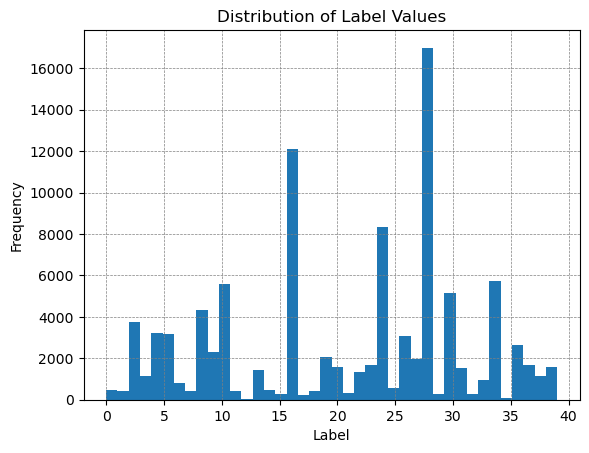

In [6]:
    plt.figure()
    plt.hist(y.numpy(), bins=y.max().item() + 1)
    plt.xlabel("Label")
    plt.ylabel("Frequency")
    plt.title("Distribution of Label Values")
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.show()

## Plot the distribution of years

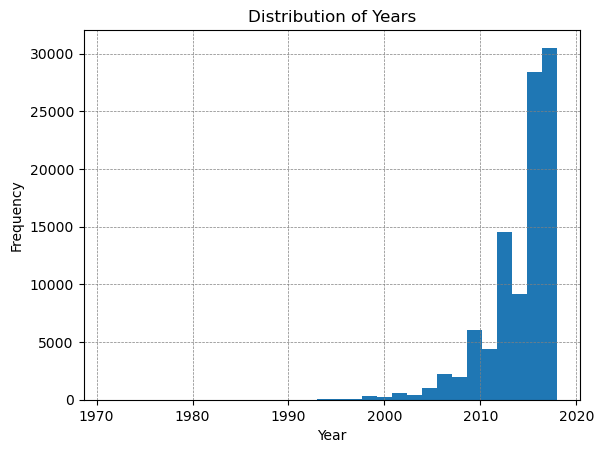

In [7]:
plt.figure()
plt.hist(node_year.numpy(), bins=30)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Distribution of Years")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

## Convert data to a NetworkX graph

In [26]:
graph = to_networkx(data, to_undirected=False)

In [27]:
# Calculate in-degree and out-degree of all nodes
in_degrees = np.array([graph.in_degree(node) for node in range(graph.number_of_nodes())])
out_degrees = np.array([graph.out_degree(node) for node in range(graph.number_of_nodes())])

# Calculate average and median for in-degree and out-degree
avg_in_degree = np.mean(in_degrees)
median_in_degree = np.median(in_degrees)
avg_out_degree = np.mean(out_degrees)
median_out_degree = np.median(out_degrees)

In [30]:
median_out_degree

2.0

###  Plot histograms for in-degree and out-degree


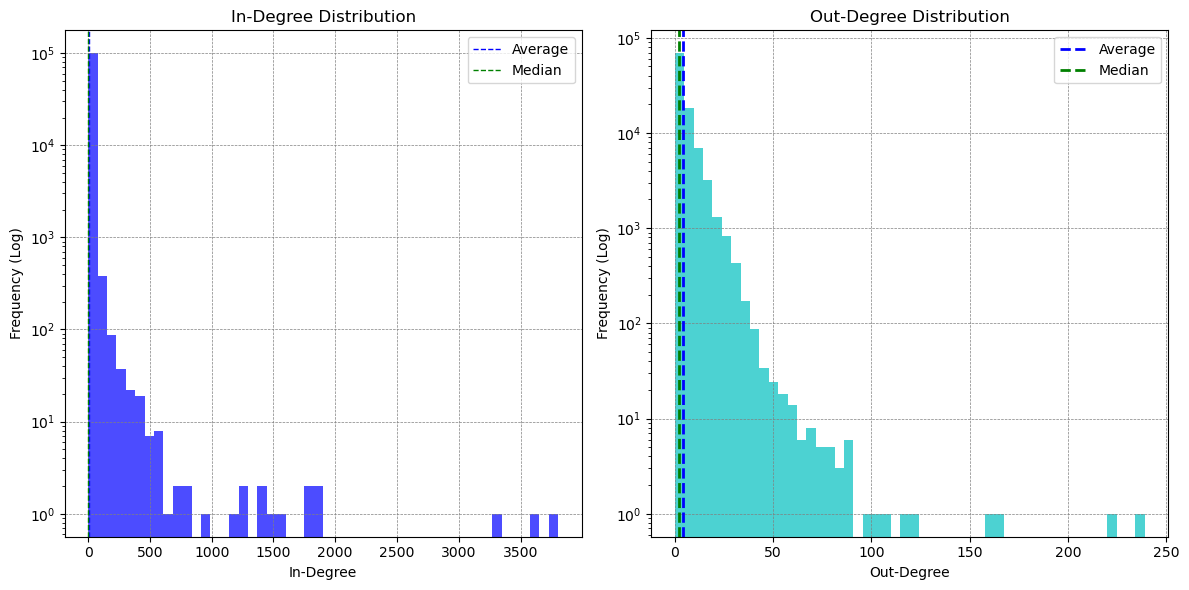

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=50, color='b', alpha=0.7)
plt.xlabel('In-Degree')
plt.ylabel('Frequency (Log)')
plt.title('In-Degree Distribution')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.axvline(avg_in_degree, color='b', linestyle='dashed', linewidth=1, label='Average')
plt.axvline(median_in_degree, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.legend()


plt.subplot(1, 2, 2)
plt.hist(out_degrees, bins=50, color='c', alpha=0.7)
plt.xlabel('Out-Degree')
plt.ylabel('Frequency (Log)')
plt.title('Out-Degree Distribution')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.axvline(avg_out_degree, color='b', linestyle='dashed', linewidth=2, label='Average')
plt.axvline(median_out_degree, color='g', linestyle='dashed', linewidth=2, label='Median')
plt.legend()


plt.tight_layout()
plt.show()

In [33]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graph)

# Sort nodes by betweenness centrality in descending order
sorted_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)

# Print top 10 nodes with highest betweenness centrality
print("Top 10 Nodes with Highest Betweenness Centrality:")
for i, node in enumerate(sorted_nodes[:10]):
    print(f"Node {node}: {betweenness_centrality[node]}")

# Plot the distribution of betweenness centrality
plt.hist(list(betweenness_centrality.values()), bins=50, color='b', alpha=0.7)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Betweenness Centrality')
plt.show()

KeyboardInterrupt: 

####  Print example node details


In [12]:
example_node_idx = 0
in_degree = graph.in_degree(example_node_idx)
out_degree = graph.out_degree(example_node_idx)
print("Example Node Details:")
print("Node Index:", example_node_idx)
print("Features:", x[example_node_idx])
print("Label:", y[example_node_idx].item())
print("Year:", node_year[example_node_idx].item())
print("Is in training set:", train_mask[example_node_idx].item() == 1)
print("Is in validation set:", val_mask[example_node_idx].item() == 1)
print("In-Degree:", in_degree)
print("Out-Degree:", out_degree)

Example Node Details:
Node Index: 0
Features: tensor([-0.0579, -0.0525, -0.0726, -0.0266,  0.1304, -0.2414, -0.4492, -0.0184,
        -0.0872,  0.1123, -0.0921, -0.2896, -0.0810,  0.0745, -0.1562, -0.0974,
         0.1194,  0.6458,  0.0774, -0.0939, -0.4004,  0.3114, -0.5418,  0.0805,
        -0.0069,  0.5423, -0.0122, -0.1808,  0.0165,  0.0508, -0.2083, -0.0870,
         0.0124,  0.2817,  0.1004, -0.1643,  0.0269,  0.0782,  0.0795, -0.0134,
         0.2915,  0.0416, -0.1414, -0.1345,  0.0162,  0.2810, -0.0919, -0.2403,
         0.4618,  0.1873,  0.1533,  0.0331,  0.0108,  0.0124, -0.1589,  0.0980,
         0.0305,  0.0162, -0.0957,  0.0521,  0.3218, -0.1057,  0.2229, -0.1206,
        -0.1723,  0.3954,  0.0883, -0.2219,  0.2310, -0.2096, -0.1125, -0.0644,
         0.0697, -0.1574,  0.0223, -0.4190,  0.1344,  0.2605,  0.0417, -0.0935,
        -0.0516, -0.0255,  0.7744,  0.0581,  0.0452,  0.0571, -0.5482, -0.0464,
         0.8728,  0.0119,  0.3891, -0.0859,  0.1116,  0.0618,  0.0015,  0.